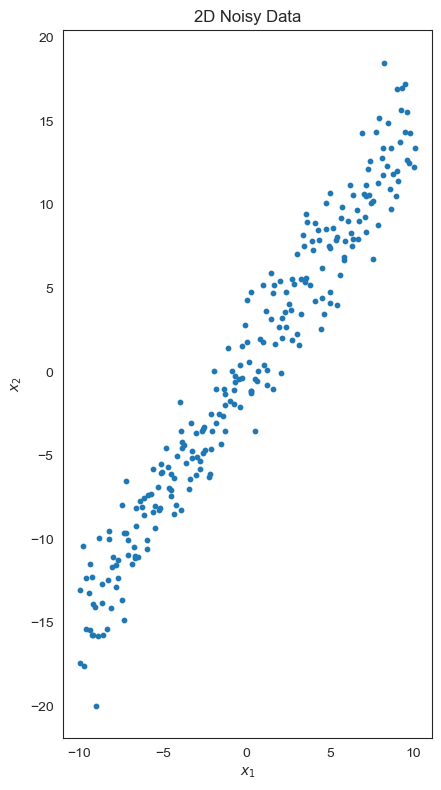

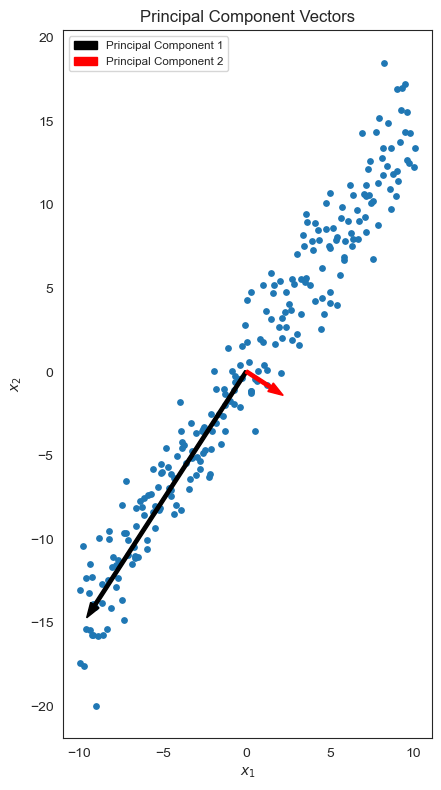

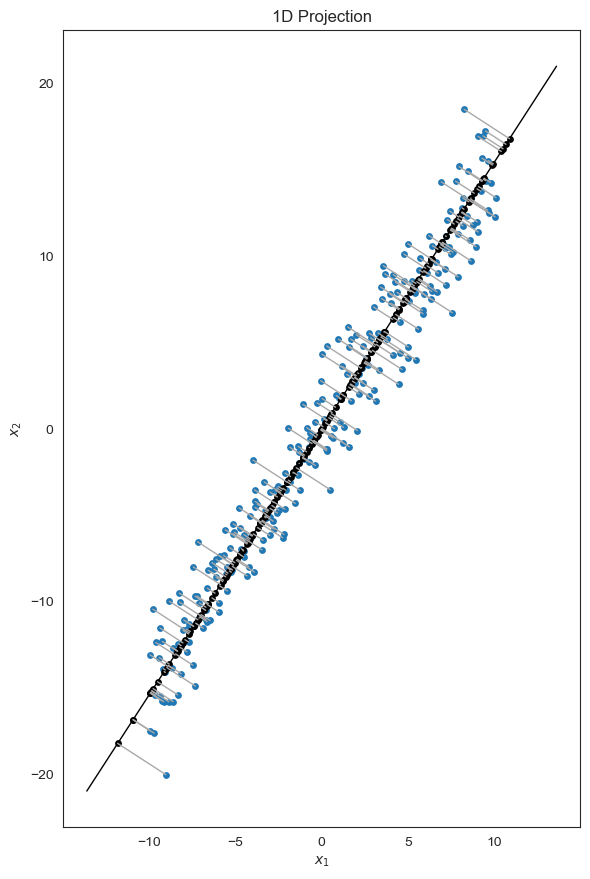

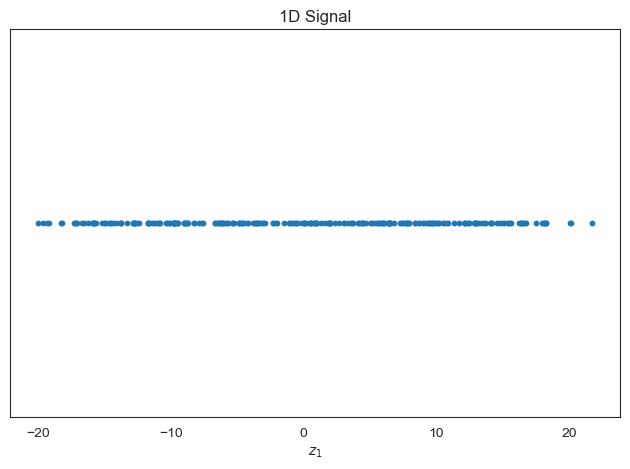

In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import pandas as pd
import numpy as np
from numpy.linalg import lstsq
from numpy.random import randn, seed
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_style('white')
seed(42)


# Create Noisy, Correlated Data from Signal

n_signals = 250
x1 = np.linspace(-10, 10, n_signals) + .1 * randn(n_signals)
x2 = 1.5 * x1 + 2 * randn(n_signals)
data = pd.DataFrame({'$x_1$': x1, '$x_2$': x2})
ax = data.plot.scatter(x=0, y=1, s=10, title='2D Noisy Data', figsize=(7,8))
ax.set_aspect('equal')
plt.tight_layout()


# Compute Principal Components

pca = PCA()
pca.fit(data)

mean = pca.mean_

pc1, pc2 = np.split(pca.components_.T, 2, axis=1)

# Plot Principal Components as new Basis Vectors

l1, l2 = pca.singular_values_ / 10

ax = data.plot.scatter(x=0, y=1, s=15, title='Principal Component Vectors', figsize=(6,8))
ax.set_aspect('equal')
origin_x, origin_y = pca.mean_
dx1, dy1 = np.squeeze(pc1.T) * l1
dx2, dy2 = np.squeeze(pc2.T) * l2
pc1_arrow = ax.arrow(origin_x, origin_y, dx1, dy1,  width=.2, color='k')
pc2_arrow = ax.arrow(origin_x, origin_y, dx2, dy2,  width=.2, color='r')
plt.legend([pc1_arrow, pc2_arrow], 
           ['Principal Component 1', 'Principal Component 2'], 
           fontsize='small')
plt.tight_layout()


# Project 2D data onto the first Principal Component

# de-mean data, convert to numpy array
data_ = data.sub(data.mean())
X_ = data_.values
x_, y_ = X_.T
ax = pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$', 
                                                           y='$x_2$', 
                                                           s=15, 
                                                           title='1D Projection', 
                                                           figsize=(6, 12))
ax.set_aspect('equal')

# plot first component
t = np.linspace(-25, 25, n_signals)
pc_x, pc_y = t * pc1
ax.plot(pc_x, pc_y, c='k', lw=1)

# project original data on first component
proj_x, proj_y = (X_.dot(pc1) * pc1.T).T
ax.scatter(proj_x, proj_y, s=15, c='k')

# plot link from data to projected points
lines_x, lines_y = np.c_[x_, proj_x], np.c_[y_, proj_y]
ax.plot(lines_x.T, lines_y.T, lw=1, c='darkgrey')
plt.tight_layout()


# Plot 1D Representation

projection1D = data_.dot(pc1)
ax = projection1D.rename(columns={0: '$z_1$'})\
    .assign(x2=0).plot.scatter(x='$z_1$', y='x2', s=10, title='1D Signal')
ax.get_yaxis().set_visible(False)
plt.tight_layout();




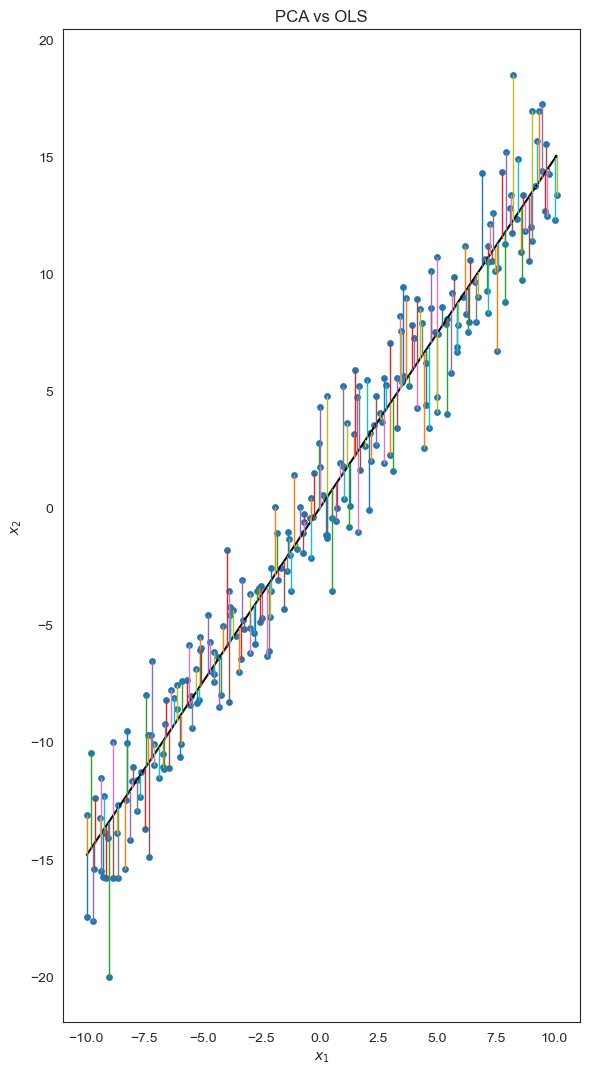

In [4]:

# Compare to Linear Regression

ax = pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$', 
                                                           y='$x_2$', 
                                                           s=15, 
                                                           title='PCA vs OLS', 
                                                           figsize=(6, 12))
ax.set_aspect('equal')

# get OLS line
reg_X = np.column_stack((x_, np.ones_like(x_)))
(m, b), _, _, _ = lstsq(reg_X, y_)
reg_y = m * x_ + b
ax.plot(x_, reg_y, c='k')

# plot residuals
lines_x, lines_y = np.c_[x_, x_], np.c_[y_, reg_y]
ax.plot(lines_x.T, lines_y.T, lw=1)
plt.tight_layout()

